In [1]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import ParameterGrid
import numpy as np


/home/deadshot/GitHub/timeseries-forecasting-hub/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Load sample dataset - you can replace this with your dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df.columns = ['ds', 'y']  # Prophet requires these column names
df['ds'] = pd.to_datetime(df['ds'])


In [3]:

# Split into train/test
train_size = int(len(df) * 0.85)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]


In [4]:

# Function to train Prophet with given params
def train_prophet(train_df, params):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        seasonality_mode=params['seasonality_mode'],
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False
    )
    model.fit(train_df)
    return model

In [5]:
# Function to forecast and evaluate using MAPE
def evaluate_prophet(model, test_df, periods):
    future = model.make_future_dataframe(periods=periods, freq='MS')
    forecast = model.predict(future)
    forecast = forecast[['ds', 'yhat']].set_index('ds')
    test_df = test_df.set_index('ds')
    
    # Align predictions with test period
    y_true = test_df['y']
    y_pred = forecast.loc[test_df.index, 'yhat']
    
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mape, y_true, y_pred



In [6]:
# Define hyperparameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}
grid = list(ParameterGrid(param_grid))


# Grid search
best_score = np.inf
best_params = None
results = []

for params in grid:
    model = train_prophet(train_df, params)
    mape, _, _ = evaluate_prophet(model, test_df, periods=len(test_df))
    results.append((params, mape))
    print(f"Params: {params}, MAPE: {mape:.4f}")
    
    if mape < best_score:
        best_score = mape
        best_params = params

print("\n✅ Best Params:", best_params)
print("✅ Best MAPE:", best_score)


11:09:43 - cmdstanpy - INFO - Chain [1] start processing
11:09:43 - cmdstanpy - INFO - Chain [1] done processing
11:09:43 - cmdstanpy - INFO - Chain [1] start processing
11:09:43 - cmdstanpy - INFO - Chain [1] done processing
11:09:44 - cmdstanpy - INFO - Chain [1] start processing
11:09:44 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, MAPE: 0.0709
Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, MAPE: 0.0706


11:09:44 - cmdstanpy - INFO - Chain [1] start processing
11:09:44 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, MAPE: 0.0390
Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, MAPE: 0.0392


11:09:44 - cmdstanpy - INFO - Chain [1] start processing
11:09:44 - cmdstanpy - INFO - Chain [1] done processing
11:09:44 - cmdstanpy - INFO - Chain [1] start processing
11:09:44 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, MAPE: 0.0705


11:09:45 - cmdstanpy - INFO - Chain [1] start processing
11:09:45 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, MAPE: 0.0696


11:09:45 - cmdstanpy - INFO - Chain [1] start processing
11:09:45 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, MAPE: 0.0765


11:09:45 - cmdstanpy - INFO - Chain [1] start processing
11:09:45 - cmdstanpy - INFO - Chain [1] done processing
11:09:45 - cmdstanpy - INFO - Chain [1] start processing
11:09:45 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, MAPE: 0.0756
Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, MAPE: 0.0900


11:09:46 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, MAPE: 0.0910


11:09:46 - cmdstanpy - INFO - Chain [1] done processing
11:09:46 - cmdstanpy - INFO - Chain [1] start processing
11:09:46 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, MAPE: 0.0867
Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, MAPE: 0.0862

✅ Best Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
✅ Best MAPE: 0.038983193077206144


In [7]:
# Train final model on full data with best params
final_model = train_prophet(df, best_params)
future = final_model.make_future_dataframe(periods=12, freq='MS')
forecast = final_model.predict(future)

11:09:46 - cmdstanpy - INFO - Chain [1] start processing
11:09:46 - cmdstanpy - INFO - Chain [1] done processing


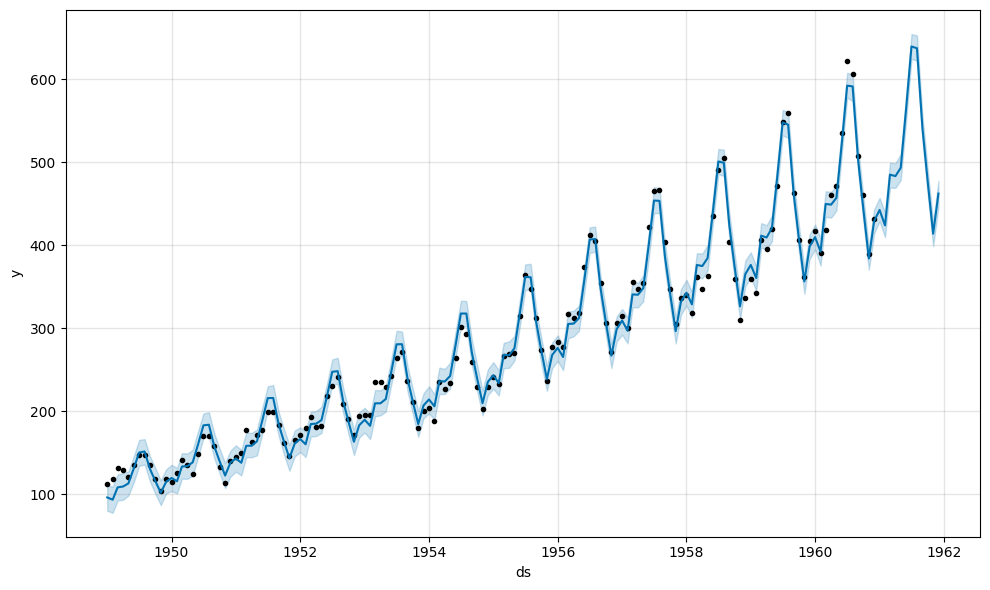

In [8]:

# Plot forecast
final_model.plot(forecast);